# Author: Joydeep Barman
# GRIP @ The Sparks Foundation
# Data Science & Business Analytics intern
# Batch: September 2023

In [2]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
students=pd.read_csv("http://bit.ly/w-data")

In [4]:
# see first 5 rows of the dataset
students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# see last 5 rows of the dataset
students.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# shape
students.shape

(25, 2)

this dataset have 25 rows and 2 columns

In [7]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In this dataset both the column have numerical value

In [8]:
# statistical summary
students.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# check duplicate values
students.duplicated().sum()

0

there is no duplicate value in this dataset

In [10]:
# check missing values
students.isnull().sum()

Hours     0
Scores    0
dtype: int64

this dataset does not contain any null values

<Axes: >

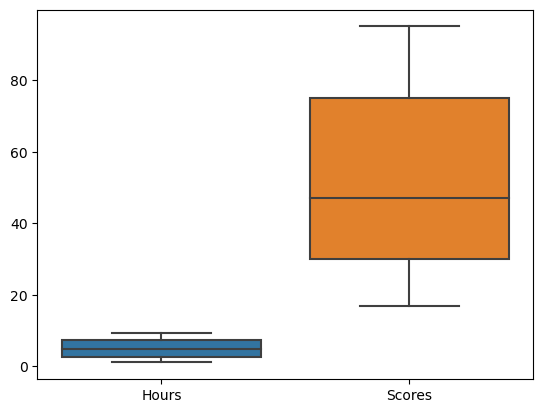

In [11]:
# check outliers
sns.boxplot(students)

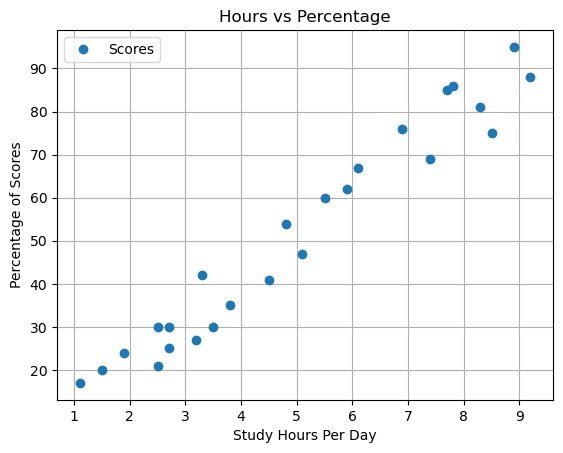

In [12]:
# Plotting the distribution of scores
students.plot(x='Hours', y='Scores',style='o') 
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hours Per Day')  
plt.ylabel('Percentage of Scores')  
plt.grid(True)
plt.show()

### Input Variable

In [13]:
X = students.iloc[:, :-1].values  
y = students.iloc[:, 1].values  

In [14]:
# train test split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [15]:
# Perform linear regression model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

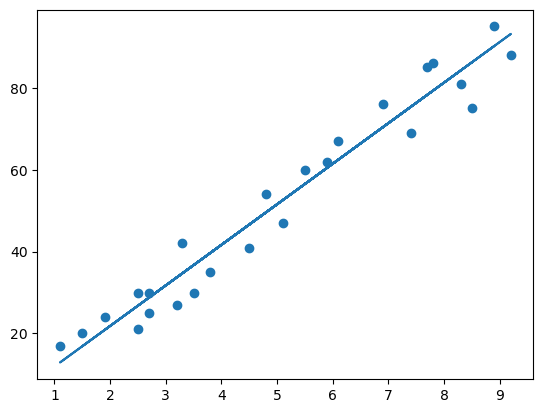

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [17]:
# predicted value
y_pred = regressor.predict(X_test)

In [18]:
# Comparing Actual vs Predicted
data= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [23]:
# Calculating error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.183859899002975
MSE: 21.5987693072174
RMSE: 4.6474476121003665


In [30]:
hours = 9.25
hours_2d = np.array(hours).reshape(1, -1)
result = regressor.predict(hours_2d)
print("Predicted Score = {}".format(result[0]))

Predicted Score = 93.69173248737538


In this project i develop linear regression model and get good mae and rmse score. Now if any student study for 9.25 hours per
day then student get the score 93.70.